In [1]:
import os
import pandas as pd
from pmdarima.arima import auto_arima
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
os.chdir(r"D:\March 2024\PML\Datasets")

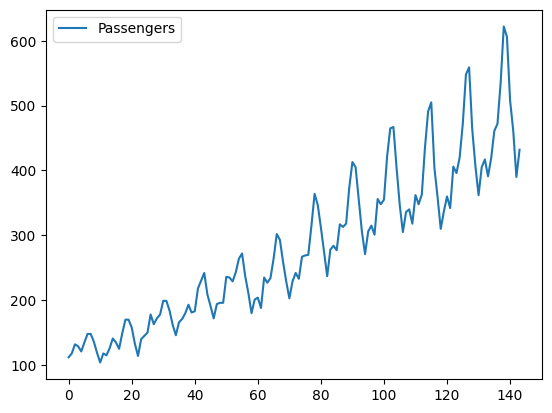

In [3]:
air = pd.read_csv("AirPassengers.csv")
air.plot()
plt.show()

In [4]:
y = air['Passengers']
y_train = y[:-12]
y_test = y[-12:]

In [5]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=1.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1276.259, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=1.03 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=1225.563, Time=0.41 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 15.93

In [7]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])
forecast

,Prediction
132,415.820688
133,442.382091
134,476.861314
135,509.980074
136,533.635252
137,542.983231
138,537.463112
139,520.575098
140,498.582268
141,478.579823


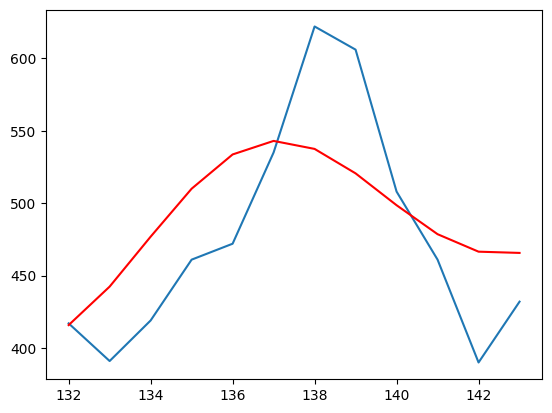

In [8]:
# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

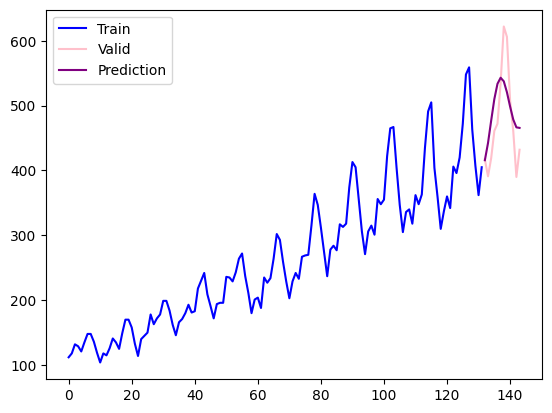

In [9]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [10]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 53.290


SARIMA

In [11]:
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=2.56 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.50 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=6.16 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.46 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=907.049, Time=3.57 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.36 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.66 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.19 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.53 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

In [12]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

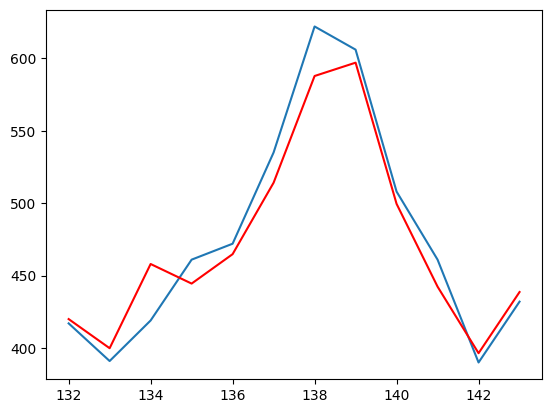

In [13]:
# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

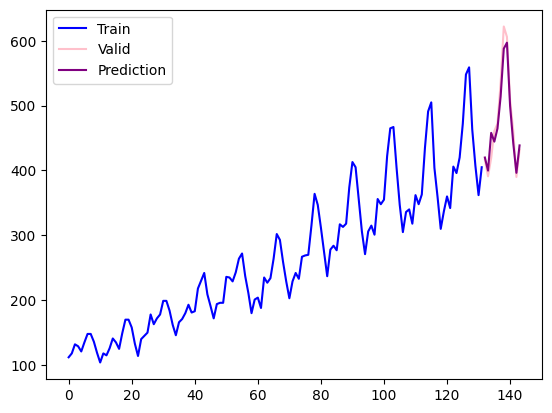

In [14]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [15]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 18.536
